In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../DATA/cancer_classification.csv")
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

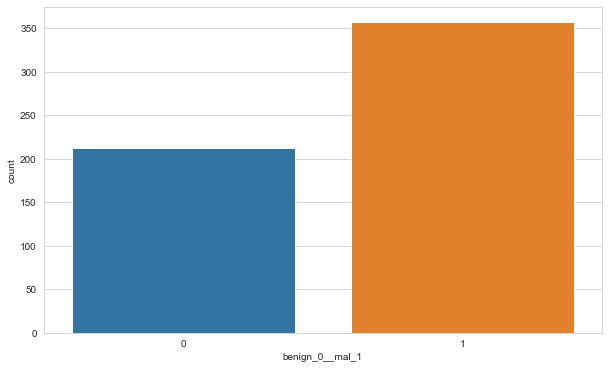

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x="benign_0__mal_1", data=df)

<AxesSubplot:>

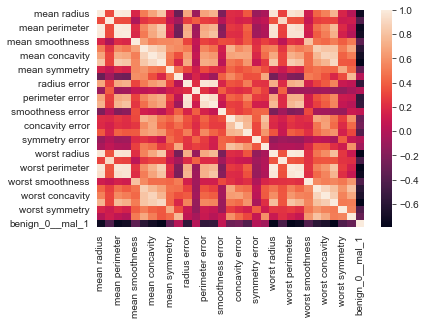

In [10]:
sns.heatmap(df.corr(), annot=False)

In [12]:
df.corr()["benign_0__mal_1"].sort_values(ascending=True)

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

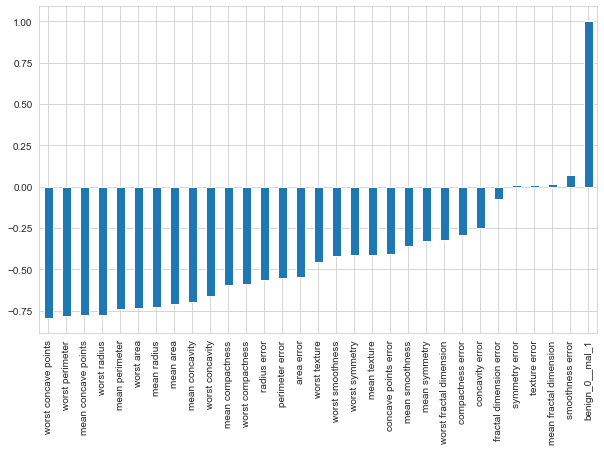

In [13]:
df.corr()["benign_0__mal_1"].sort_values().plot(kind="bar", figsize=(10,6))

<AxesSubplot:>

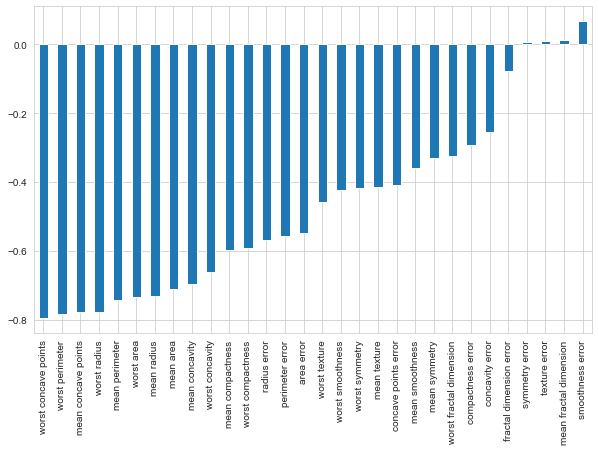

In [14]:
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind="bar", figsize=(10,6))

In [15]:
# train test split

from sklearn.model_selection import train_test_split

x = df.drop(["benign_0__mal_1"], axis=1).values
y = df["benign_0__mal_1"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [18]:
# creating the model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [19]:
x_train.shape

(455, 30)

In [20]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

# for binary classification, use binary_crossentropy
model.compile(loss="binary_crossentropy", optimizer="adam")

In [21]:
# training the model

model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
15/15 [==============================] - 15s 29ms/step - loss: 0.6959 - val_loss: 0.6850
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6728 - val_loss: 0.6581
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6514 - val_loss: 0.6306
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6273 - val_loss: 0.5963
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5978 - val_loss: 0.5571
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5630 - val_loss: 0.5137
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5230 - val_loss: 0.4660
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4812 - val_loss: 0.4163
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4347 - val_loss: 0.3637
Epoch 10/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3876 - val_loss: 0.3185
Epoch 1

In [22]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,0.695915,0.685006
1,0.672758,0.658132
2,0.651421,0.630645
3,0.627259,0.596323
4,0.597839,0.557061


<AxesSubplot:>

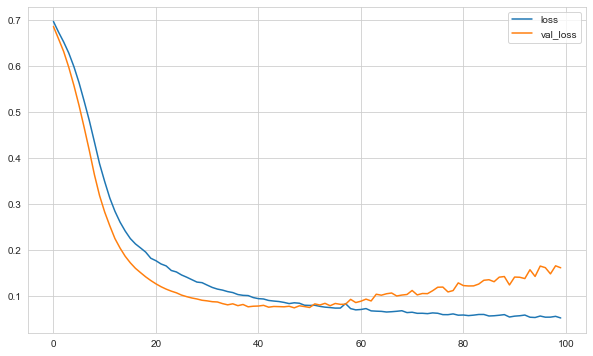

In [25]:
model_loss.plot(figsize=(10,6))

In [26]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

# for binary classification, use binary_crossentropy
model.compile(loss="binary_crossentropy", optimizer="adam")

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [29]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [30]:
model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/200
15/15 [==============================] - 1s 16ms/step - loss: 0.6816 - val_loss: 0.6666
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6566 - val_loss: 0.6350
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.5910
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5875 - val_loss: 0.5464
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5504 - val_loss: 0.4939
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5025 - val_loss: 0.4427
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4528 - val_loss: 0.3851
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4056 - val_loss: 0.3390
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3572 - val_loss: 0.2994
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3204 - val_loss: 0.2678
Epoch 11

<AxesSubplot:>

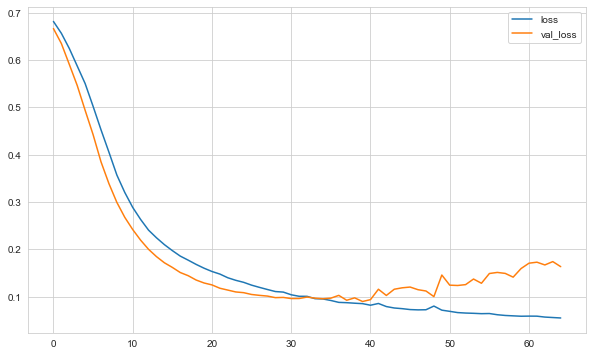

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(10,6))

In [32]:
# adding in dropout layers
from tensorflow.keras.layers import Dropout

In [33]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.5))

# for binary classification
model.add(Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")

In [34]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
15/15 [==============================] - 1s 12ms/step - loss: 0.7293 - val_loss: 0.6656
Epoch 2/600
15/15 [==============================] - 0s 3ms/step - loss: 0.6848 - val_loss: 0.6501
Epoch 3/600
15/15 [==============================] - 0s 3ms/step - loss: 0.6730 - val_loss: 0.6321
Epoch 4/600
15/15 [==============================] - 0s 3ms/step - loss: 0.6561 - val_loss: 0.6119
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6189 - val_loss: 0.5857
Epoch 6/600
15/15 [==============================] - 0s 3ms/step - loss: 0.6113 - val_loss: 0.5545
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6013 - val_loss: 0.5258
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5949 - val_loss: 0.5008
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5475 - val_loss: 0.4639
Epoch 10/600
15/15 [==============================] - 0s 3ms/step - loss: 0.5154 - val_loss: 0.4270
Epoch 11

<AxesSubplot:>

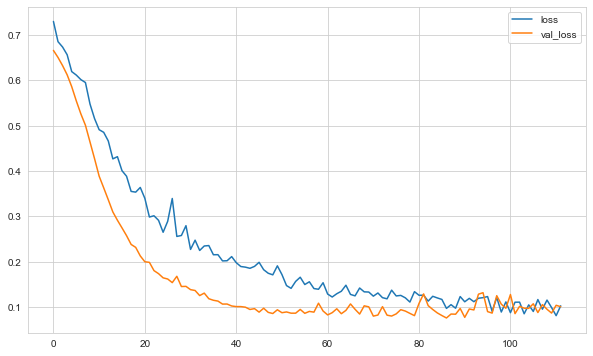

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(10,6))